### Import libraries and modules

In [10]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

### MNIST Dataset reading

In [11]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

### Data treatment

In [12]:
#data normalize
x_train_raw = x_train_raw.astype('float32') / 255.0
x_test = x_test_raw.astype('float32') / 255.0
#adding grayscale channel
x_train_raw = np.expand_dims(x_train_raw, -1)
x_test = np.expand_dims(x_test, -1)
#categorical labels
y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)
#data quantity assigment
x_train = x_train_raw[1:40001,:,:,:] 
y_train = y_train[1:40001,:]

### Construction of the neural network

In [13]:
def BuildModel():
    
    #Sequential NN creation w/ 1 dense hidden layer
    model = Sequential([
        Flatten(),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=0.1)
    
    model.compile(
        loss = 'mse',
        optimizer = optimizer,
        metrics = ['accuracy'] 
    )
    
    return model

In [14]:
model = BuildModel()

### Model Trainning

In [15]:
history = model.fit(
    x_train, y_train,
    epochs = 20
)

model.summary()

Epoch 1/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.1127 - accuracy: 0.1551
Epoch 2/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.0818 - accuracy: 0.2664
Epoch 3/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.0744 - accuracy: 0.3919
Epoch 4/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0661 - accuracy: 0.4987
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 0.0587 - accuracy: 0.5941
Epoch 6/20
1250/1250 [==============================] - 16s 13ms/step - loss: 0.0529 - accuracy: 0.6366
Epoch 7/20
1250/1250 [==============================] - 28s 23ms/step - loss: 0.0485 - accuracy: 0.6724
Epoch 8/20
1250/1250 [==============================] - 30s 24ms/step - loss: 0.0448 - accuracy: 0.6836
Epoch 9/20
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0417 - accuracy: 0.7201
Epoch 10/20
1250/1250 [==============================] - 19s 15m

### Loss vs. Epochs Graph

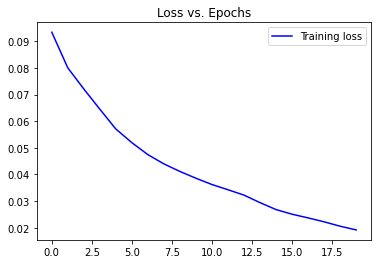

In [17]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()